In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import nonlinear_QM_FPJPA as Fs
import wx_programs as wx
import bnc
from generator import *
from hardware_config import *
from values import *
from qubit_class import *
import standard_sequences.pinopi as pnp
import daq.daq_programs_homo as daq
import standard_sequences.spectroscopy as spec
import standard_sequences.rabi as rabi
from analysis.analysis import *


from sklearn.cluster import KMeans

In [2]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
print(f"{q1}\n{q2}")

q2.ro_amp = 0.2
q2.ge_time = 40.1360267438721
q2.IQ_angle = 247

Qubit(ROq3=6.583064, ef_amp=1, ge_ssm=-0.11, ro_freq=6.7275, ef_time=78.05067663337411, qubit_id=q1, RO_LO=6.6247, RO_LO_pwr=16, ge_time=52.35258023759522, qubit_thr=[-5000, 5000], ROIF=0.10280000000000022, IQ_angle=240, ro_amp=0.5, ef_ssm=-0.255, ro_dur=5000, ge_amp=1.2)
Qubit(ROq3=6.583064, ef_amp=1, ge_ssm=-0.152, ro_freq=6.65555, ef_time=None, qubit_id=q2, RO_LO=6.6247, RO_LO_pwr=16, ge_time=40.15374412400174, qubit_thr=[-5000, 5000], ROIF=0.030850000000000044, IQ_angle=220, ro_amp=0.5, ef_ssm=-0.224, ro_dur=5000, ge_amp=1.2)


In [3]:
wx_addr = wx.get_wx_address()
main_directory = r"C:\Users\quantum1\Documents"
save_dir = rf"{main_directory}\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\data"
target_bnc_address_6 = "USB0::0x03EB::0xAFFF::411-433500000-0753::INSTR"
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=target_bnc_address_6
)
num_steps = 3
reps = 10000
sweep_time = 500

In [4]:
pnp.pi_nopi_ge(0, 0, q2, q1, gen_vals = general_vals_dict)
pnp.pi_nopi_ge(1, 1, q2, q1,gen_vals = general_vals_dict)
#pnp.pi_nopi_ef(0,0,q1,q2, gen_vals = general_vals_dict)
#pnp.pi_nopi_ef(1,0,q1, q2, gen_vals = general_vals_dict)

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error


0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 10000
Buffers per acquistion: 10
DAQ samples per pattern: 8192
0, No error
Capturing 10 buffers. Press <enter> to abort
Capture completed in 4.473589 sec
Captured 10 buffers (2.235341 buffers per sec)
Captured 30720 records (6866.969029 records per sec)
Transferred 503316480 bytes (112508420.579230 bytes per sec)


<Figure size 800x800 with 0 Axes>

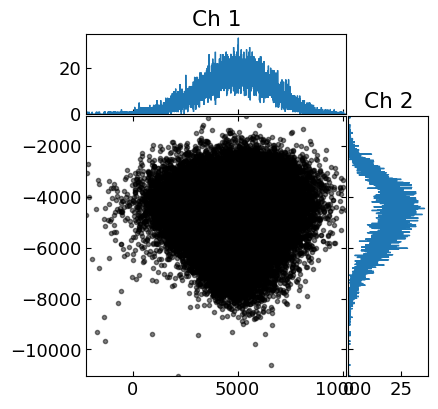

<Figure size 800x800 with 0 Axes>

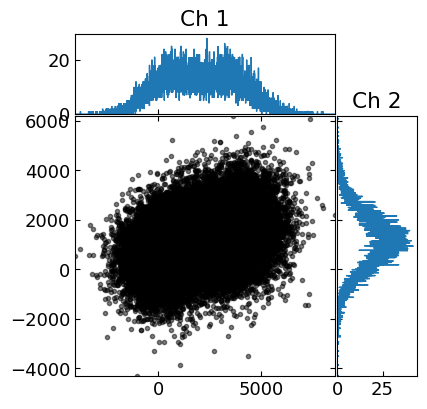

In [5]:
wx.wx_set_and_amplitude_and_offset(
    amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
)
values = daq.run_daq_het_2q(q1, q2,
                   num_patterns=num_steps, num_records_per_pattern=reps,
                    verbose=True)

I histogram


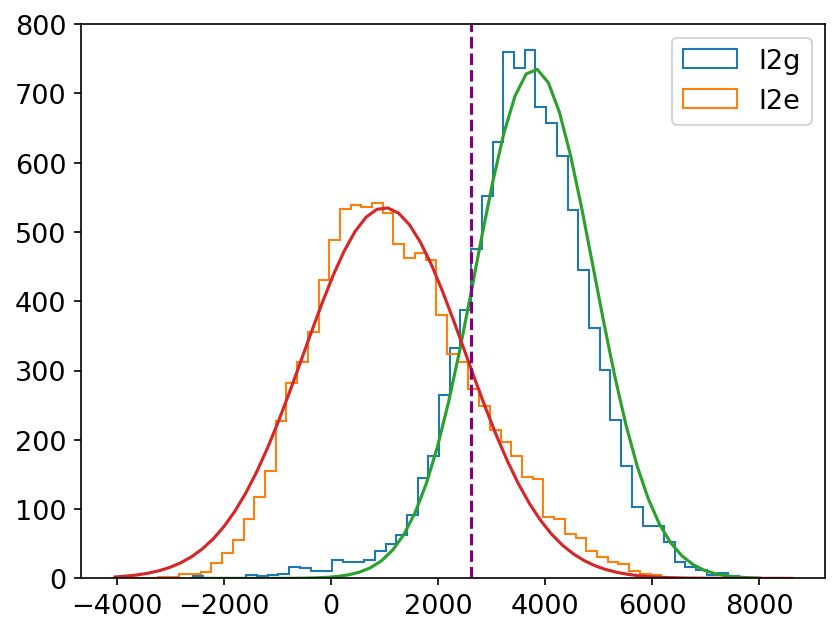

Q histogram


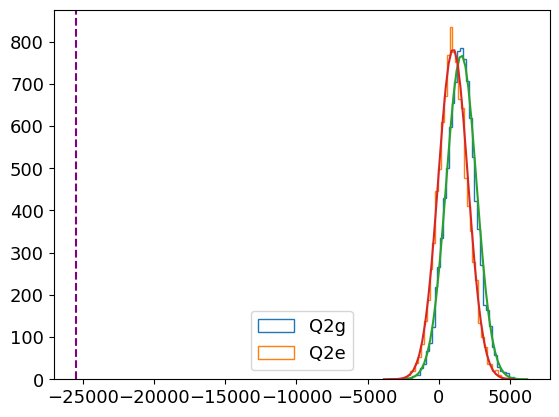

SNR of Qubit2: 2.4117574965522888


In [6]:
# IQ Histograms
def make_hist(IQdata, ax_hist, labelstr):
    binwidth = 200
    lim_IQ_min = np.min([IQdata])
    lim_IQ_max = np.max([IQdata])
    
    bins_IQ = np.arange(lim_IQ_min, lim_IQ_max, binwidth)
    
    counts_IQ = ax_hist.hist(IQdata, bins=bins_IQ, histtype='step', orientation='vertical', label = labelstr)[0]
    
    gauss_xaxis = np.linspace(lim_IQ_min,lim_IQ_max, len(counts_IQ))
    
    
    return bins_IQ,counts_IQ, gauss_xaxis

plt.figure(dpi = 150)
axI2= plt.axes()
print("I histogram")
I2g = values.rec_readout_vs_pats_2[0,:,0]
I2e = values.rec_readout_vs_pats_2[0,:,1]
bins_Ig2, counts_Ig2, gauss_xaxis_Ig2 = make_hist(values.rec_readout_vs_pats_2[0,:,0],axI2, 'I2g')
bins_Ie2, counts_Ie2, gauss_xaxis_Ie2 = make_hist(values.rec_readout_vs_pats_2[0,:,1],axI2, 'I2e')

w0_Ig2, mu_Ig2, std_Ig2 =fit_gaussian_no_plot(values.rec_readout_vs_pats_2[0,:,0], gauss_xaxis_Ig2, counts_Ig2,axI2)
w0_Ie2, mu_Ie2, std_Ie2 =fit_gaussian_no_plot(values.rec_readout_vs_pats_2[0,:,1], gauss_xaxis_Ie2, counts_Ie2,axI2)
x0, x1 = get_threshold_value_from_gaussians([w0_Ig2, mu_Ig2, std_Ig2],[w0_Ie2, mu_Ie2, std_Ie2])
plt.axvline(x0, color = 'purple', linestyle = '--')
axI2.legend()
plt.show()

axQ2= plt.axes()

print("Q histogram")
bins_Qg2, counts_Qg2, gauss_xaxis_Qg2 = make_hist(values.rec_readout_vs_pats_2[1,:,0],axQ2,'Q2g')
bins_Qe2, counts_Qe2, gauss_xaxis_Qe2 = make_hist(values.rec_readout_vs_pats_2[1,:,1],axQ2, 'Q2e')

w0_Qg2, mu_Qg2, std_Qg2 =fit_gaussian_no_plot(values.rec_readout_vs_pats_2[1,:,0], gauss_xaxis_Qg2, counts_Qg2,axQ2)
w0_Qe2, mu_Qe2, std_Qe2 =fit_gaussian_no_plot(values.rec_readout_vs_pats_2[1,:,1], gauss_xaxis_Qe2, counts_Qe2,axQ2)
x0, x1 = get_threshold_value_from_gaussians([w0_Qe2, mu_Qe2, std_Qe2], [w0_Qg2, mu_Qg2, std_Qg2])
plt.axvline(x0, color = 'purple', linestyle = '--')
axQ2.legend()
plt.show()


 #Calculate SNR

signal = np.sqrt( (mu_Ig2 - mu_Ie2)**2 + (mu_Qg2 - mu_Qe2)**2 )
noise = (np.abs(std_Ig2) + np.abs(std_Qg2) + np.abs(std_Ie2) + np.abs(std_Qg2))/4


SNR2 = signal/noise

print("SNR of Qubit2:",SNR2)

In [7]:
values.rec_readout_vs_pats_2.shape

(2, 10000, 3)

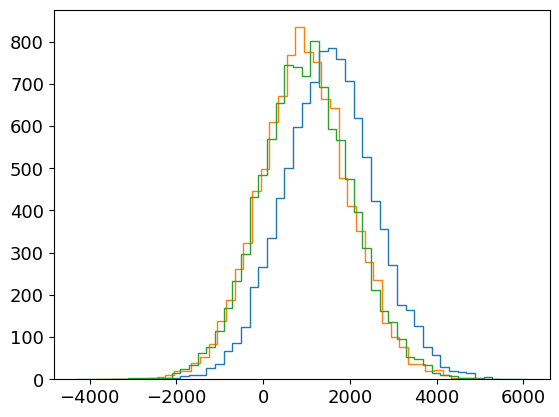

In [8]:
plt.figure()
axQ2= plt.axes()
bins_Qg2, counts_Qg2, gauss_xaxis_Qg2 = make_hist(values.rec_readout_vs_pats_2[1,:,0],axQ2,'Q2g')
bins_Qe2, counts_Qe2, gauss_xaxis_Qe2 = make_hist(values.rec_readout_vs_pats_2[1,:,1],axQ2, 'Q2e')
bins_Qf2, counts_Qf2, gauss_xaxis_Qf2 = make_hist(values.rec_readout_vs_pats_2[1,:,2],axQ2, 'Q2f')
plt.show()

10000


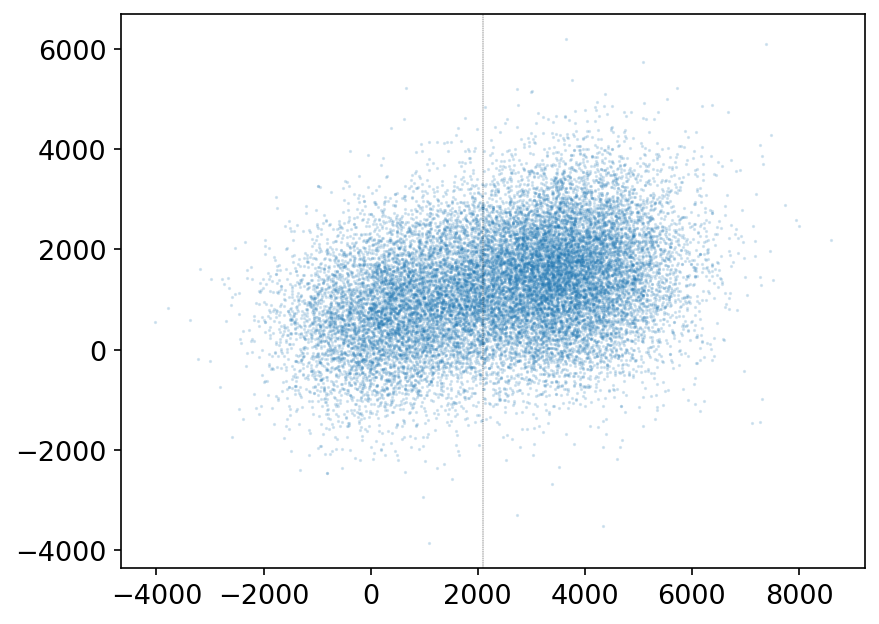

In [9]:
Idata = values.rec_readout_vs_pats_2[0,:,:2]
Idata_g = values.rec_readout_vs_pats_2[0,:,0]
Idata_e = values.rec_readout_vs_pats_2[0,:,1]
Qdata = values.rec_readout_vs_pats_2[1,:,:2]
Qdata_g = values.rec_readout_vs_pats_2[1,:,0]
Qdata_e = values.rec_readout_vs_pats_2[1,:,1]
print(len(Idata))
plt.figure(dpi =150)
plt.scatter(Idata,Qdata, s = 0.3, alpha = 0.2)
# plt.scatter(Idata_g,Qdata_g, s = 0.3, alpha = 0.2)
# plt.scatter(Idata_e,Qdata_e, s = 0.3, alpha = 0.2)
plt.axvline(2100, c='black', linestyle = '--', lw = 0.2)


In [48]:
# Flatten both arrays into shape (20000, 1)
I_flat = Idata.flatten().reshape(-1, 1)  # Shape (20000, 1)
Q_flat = Qdata.flatten().reshape(-1, 1)  # Shape (20000, 1)

# Stack them side by side to get shape (20000, 2)
IQRaw = np.hstack((I_flat, Q_flat))
training_data = IQRaw[:int(.80*len(IQRaw))]
test_data = IQRaw[int(.80*len(IQRaw)):]
# Check final shape
print(training_data.shape)  # Output: (20000, 2)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

# Fit the model
kmeans.fit(training_data)

# Get predicted cluster labels
predicted_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_



(16000, 2)


In [38]:
predicted_labels

array([0, 1, 0, ..., 1, 0, 1])

In [39]:
cluster_centers

array([[3718.26572307, 1601.68460799],
       [ 640.58972103,  764.63893979]])

In [58]:
import numpy as np
import pandas as pd

# Stack I/Q data together (same format as training_data)
X = np.vstack([
    np.column_stack((Idata_g, Qdata_g)),  # Ground state data
    np.column_stack((Idata_e, Qdata_e))   # Excited state data
])

# Create labels: 0 for ground state (g), 1 for excited state (e)
y = np.concatenate([
    np.zeros(len(Idata_g)),  # 0 for ground state
    np.ones(len(Idata_e))    # 1 for excited state
])

# Convert to DataFrame
df = pd.DataFrame(X, columns=["I", "Q"])
df["label"] = y.astype(int)  # Ensure labels are integers

# Show first few rows
print(df.head())


             I            Q  label
0  3506.636803  3085.656415      0
1  3380.777010  1294.676420      0
2  4306.999707  1204.235476      0
3  2824.200308  1887.305370      0
4  3878.689451  1208.603894      0


In [63]:
df.iloc[10:]

,I,Q,label
10,1107.168459,1651.544906,0
11,5285.710149,-572.063903,0
12,2119.709321,946.154675,0
13,4710.638007,2605.968251,0
14,3195.040771,2418.005645,0
...,...,...,...
19995,1442.687103,925.638408,1
19996,-378.256488,957.222262,1
19997,940.123192,-514.439307,1
19998,-1436.433845,524.362305,1
